<a href="https://colab.research.google.com/github/aminejguirim/artificial-intelligence-GoMyCode-/blob/main/checkpoint_Pr%C3%A9traitement_des_donn%C3%A9es%2BVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic-passengers.csv to titanic-passengers.csv


In [ ]:
import pandas as pd
df = pd.read_csv('titanic-passengers.csv',sep=";")
df.head()
#print(df['Sex'].head())
#print(df['Sex'].head().isnull())
#df.isnull().sum()
#df.isnull().sum().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
#df.dropna(axis=1, how='any')#Supprimez les colonnes où l'un des éléments manque
#df.dropna(axis=1, how='all')#Supprimez les colonnes où tous ses éléments sont des valeurs manquant
#df.dropna(thresh=2)#Ne conserver que les lignes avec un maximum de deux valeurs manquantes

,PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked


In [ ]:
#Remplacement des valeurs numériques manquantes
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.head()
print(df['Embarked'].value_counts())
df['Embarked'].fillna('S',inplace=True)
df.tail()
#print(df['Embarked']).fillna(df['S']),inplace=true)
#df['Age'].fillna(df['Age'].median(), inplace=True)
#df['Age'].fillna(df['Age'].mode(), inplace=True)

S    646
C    168
Q     77
Name: Embarked, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.000000,0,0,250655,26.0000,NaN,S


In [34]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


new_data=pd.DataFrame(x)
plt.xlabel("Age")
new_data['Age'].plot.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

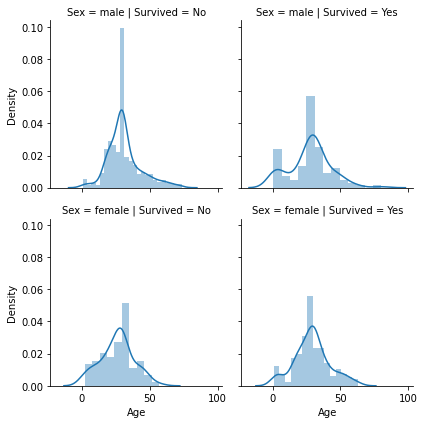

In [30]:
grid = sns.FacetGrid(df, row="Sex", col="Survived")
grid.map(sns.distplot, "Age")


In [31]:
df[["Age", "Sex"]].groupby(["Sex"], as_index=True).mean()


,Age
Sex,
female,28.216730
male,30.505824


In [32]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

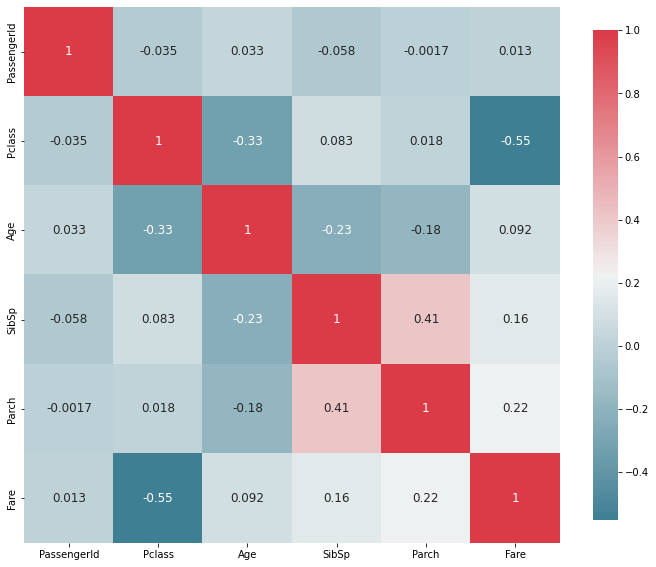

In [33]:
plot_correlation_map( df )

In [36]:
# Dropping two columns 
df.drop('Ticket',axis='columns', inplace =True ) 
df.drop('Cabin',axis='columns', inplace =True ) 
# Adding new column 
Title =[]
for i in range (0,891) :
    ch=''
    x=df['Name'][i].index(',')
    y=df['Name'][i].index('.')
    for j in range (x+2,y) :
        ch=ch+df['Name'][i][j]
    Title.append(ch)
df['Title']=Title
df.drop('Name',axis='columns', inplace =True) 
df
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
TitleFam=[]
for i in range (0,891) :
    ch=Title_Dictionary[df['Title'][i]]
    TitleFam.append(ch)
df['TitleFam']=TitleFam
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TitleFam
0,343,No,2,male,28.000000,0,0,13.0000,S,Mr,Mrs
1,76,No,3,male,25.000000,0,0,7.6500,S,Mr,Mrs
2,641,No,3,male,20.000000,0,0,7.8542,S,Mr,Mrs
3,568,No,3,female,29.000000,0,4,21.0750,S,Mrs,Mrs
4,672,No,1,male,31.000000,1,0,52.0000,S,Mr,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.000000,1,0,30.0708,C,Mrs,Mrs
887,61,No,3,male,22.000000,0,0,7.2292,C,Mr,Mrs
888,535,No,3,female,30.000000,0,0,8.6625,S,Miss,Miss
889,102,No,3,male,29.699118,0,0,7.8958,S,Mr,Mrs
